In [121]:
import custom_helpers
import mankey_dataframe as transformers
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
from custom_helpers import *

In [3]:
df=pd.read_csv('/Users/hhs2099/Dropbox/IE University/Courses/Term 3/Advanced Python/AdvPython_GroupProject_DataPreparation/titanic.csv') #missing values
df1=pd.read_csv('/Users/hhs2099/Dropbox/IE University/Courses/Term 3/Advanced Python/AdvPython_GroupProject_DataPreparation/shootings.csv') #visualization 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dir(transformers)

['MankeyDataframe',
 'MinMaxScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'custom_helpers',
 'np',
 'pd',
 'plt',
 'preprocessing']

In [6]:
dir(custom_helpers)

['BaseEstimator',
 'OrdinalEncoder',
 'Ordinal_Transformer',
 'TransformerMixin',
 'WoE_Transformer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'np',
 'pd']

In [101]:
# Define a function for automating the uni-variate and bi-variate analysis

def basic_EDA (df = df,
               variable= 'Pclass',
               target='Survived'):

    print("Missing values of " + variable + ": " + str(df[variable].isna().sum()))
    
    print(df[[variable]].describe())

    # For categorical variables:
    if (df[variable].dtypes == 'object'):
        
        # Count data instances and target average per category  
        df_plot = df.fillna('missing').groupby([variable]).aggregate({
            target: ['mean', 'count']
        }).sort_values(by=[(target,'mean')])

        # Use a red line to plot the average value of the target per category
        ax = df_plot[[(target,'mean')]].plot(kind='line', color='red', rot=45, legend=False)
        
        # Use secondary vertical axis
        ax1 = ax.twinx()

        # Use blue bars to plot the number of cases per category
        ax = df_plot[[(target,'count')]].plot(kind='bar', ax = ax1, rot=45, color='blue',
                                                  legend=False)
        
        plt.show()
        
    # For numerical variables:
    if ((df[variable].dtypes == 'float64') | 
        (df[variable].dtypes == 'int64')):
        
        # Univariate analysis: histogram  
        df[[variable]].hist(bins=40)
        plt.show()
        
        # Univariate analysis: boxplot 
        df[[variable]].boxplot()
        plt.show()
        
        # Bivariate analysis: scatter plot including variable and target 
        df.plot(kind='scatter',
                x=variable, 
                y=target)
        plt.show()

In [102]:
import pandas as pd

data = {'Type':  ['bad', 'average', 'good', 'very good','excellent'],
        'level': [1,2,3,4,5],
        }

df = pd.DataFrame(data)

print (df)


        Type  level
0        bad      1
1    average      2
2       good      3
3  very good      4
4  excellent      5


In [103]:
df1 = df[df.columns.difference(excl_feature)]
corr = df1.corr(method='spearman')
select_num_feat_all = corr.index.values
select_num_feat_spear = (corr.loc[corr['SalePrice'] >= .5].index.values)
print(select_num_feat_spear)
df1 = df[select_num_feat_spear]
corr = df1.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

NameError: name 'excl_feature' is not defined

In [109]:
import custom_helpers
import mankey_dataframe as transformers
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy

def test_basic():
    assert 1 == 1
    
def test_ordinal_transformer():
    df=pd.read_csv('/Users/hhs2099/Dropbox/IE University/Courses/Term 3/Advanced Python/AdvPython_GroupProject_DataPreparation/titanic.csv')
    t_ordinal=tansformers.Ordinal_Transformer()
    t_ordinal.fit(df)
    

In [125]:
#import mankey.custom_helpers as transformers
import pandas as pd


def test_basic():
    assert 1 == 1


def test_ordinal_one():
    import pandas as pd

    data = {'Pclass':  ['First_class', 'Second_Class', 'Third_Class','Fourth_class'],
            'level': [1, 2, 3,4],
            }

    df = pd.DataFrame(data)
    Pclass_dict = {"Pclass": ['First_class', 'Second_Class', 'Third_Class'],
                   }

    target_result = {'type':  [0, 1, 2],
                     'level': [1, 2, 3],
                     }
    target_df = pd.DataFrame(target_result)

    t_ord = transformers.Ordinal_Transformer()
    t_ord.fit( Pclass_dict, df,None, input_vars=['Pclass'])

    df = t_ord.transform(df, None)
    pd.testing.assert_frame_equal(df, target_df)


There is 11 non numerical features including:
['name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'threat_level', 'flee', 'arms_category']


KeyboardInterrupt: 

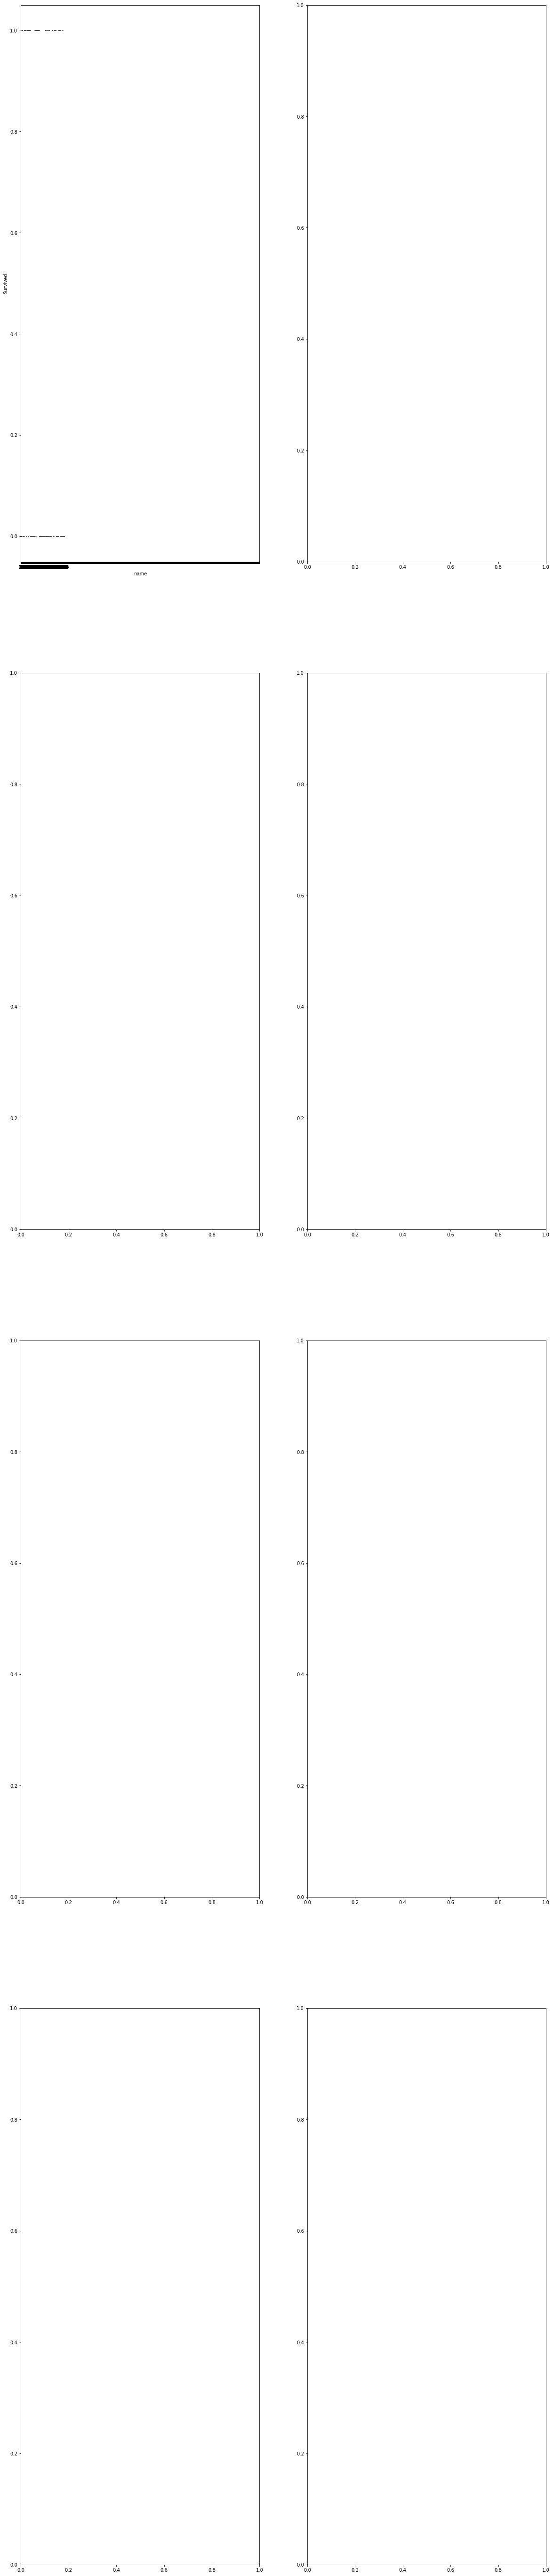

In [81]:
df_not_num = shootings.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 2, figsize=(20, 100))
for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        
        if df_not_num.columns[i] == 'Cabin':
            sns.boxplot(y=df_not_num.columns[i], x=df["Survived"], data=df_not_num, ax=ax)
        else:
            sns.boxplot(x=df_not_num.columns[i], y=df["Survived"], data=df_not_num, ax=ax)

fig.tight_layout()